<img width="180" height="300" align ="left" src="img/iteso.jpg">

<body>
<head>
<div align="right">
    <h4><b>Proyecto #2: clasificación de flores</b></h4>
</div>
</head>
<div align="right">
<br><br><br>         
<h5>César Villarreal Hernández, ie707560</h5>              
</div>
<div align="right">
<h5>Aprendizaje Máquina</h5>   
</div>
<div align="right">
<h5>Lunes 21 de Junio de 2021</h5>  
</div>
</body>

#### **I. Introducción**
---

El objetivo de la primera parte de este proyecto consiste en utilizar el conjunto de datos de Iris y realizar un clasificador utilizando regresión lógística para los tres tipos de flores: Iris-Setosa, Iris-Versicolo, e Iris-Virgínica. En la segunda parte se construirá un conjunto de datos de imágenes de arreglos florales, se utilizará diferentes tipos de clasificadores, y se evaluará el desempeño de los modelos con sus variantes.

#### **II. Marco Teórico**
--- 

<h5><b>Clasificación</b></h5>

"Las tareas basadas en clasificación son un subcampo del aprendizaje máquina supervisado, donde la clave es predeccir las etiquetas de salida o respuestas que son categoricas por naturaleza, para un dato de entrada basado en lo que el modelo ha aprendido durante la fase de entrenamiento" ().


#### **II. Desarollo Teórico**
---



Lo primero que debemos realizar es análizar el dataset de Iris, de manera que podamos entender los datos que vamos a manejar. 


In [181]:
import pandas as pd

#1. Importar conjunto de datos de Iris
data_frame = pd.read_csv("Iris.csv")
print(data_frame.head())
n_col = len(data_frame.columns)
n_rows = len(data_frame.index)

print("\nNúmero de columnas = %i" % n_col)
print("Número de filas = %i\n" % n_rows)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Número de columnas = 6
Número de filas = 150



Se puede observar que tenemos seis columnas en nuestro conjunto de datos: el identifificador, longitud de sepalo, ancho de sepalo, longitud de petalo y ancho de petalo, y la especie de la planta.


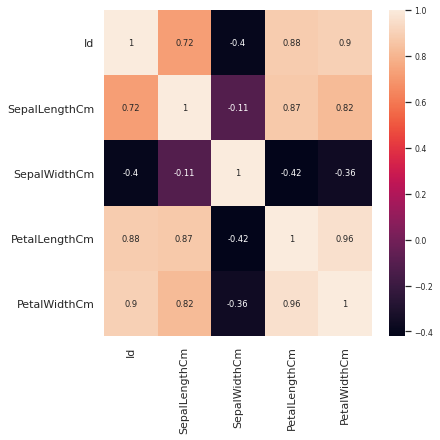

In [182]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

cols = data_frame.columns.to_numpy()
correlation_matrix = data_frame.corr().round(2)
fig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=0.7)
hm = sns.heatmap(correlation_matrix, annot=True)
plt.show()


<Figure size 500x150 with 0 Axes>

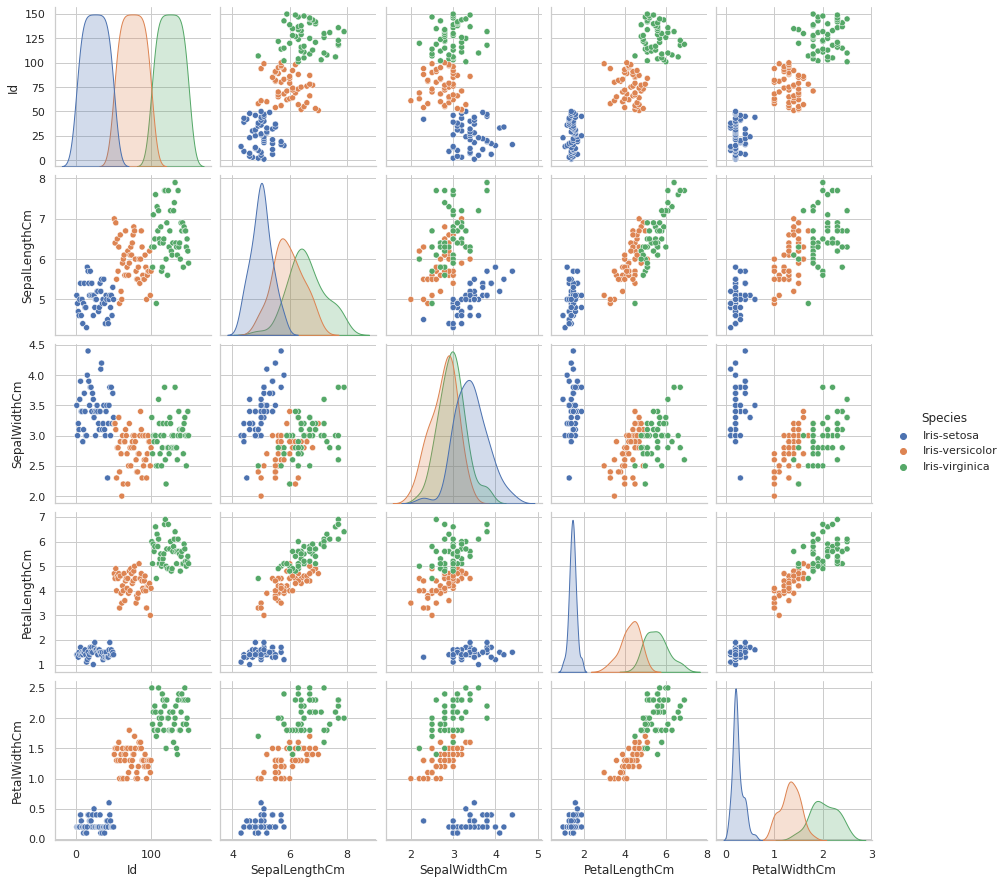

In [183]:
import matplotlib.pyplot as pltlos
from matplotlib.pyplot import figure
import seaborn as sns

sns.set(style='whitegrid', context='notebook')
cols = data_frame.columns

figure(figsize=(10, 3), dpi=50)
sns.pairplot(data_frame[cols], height=2.5,  hue="Species");
plt.show()

A partir de la matriz de correlación podemos afirmar que existe una alta correlación entre los datos, por lo que podemos esperar que los resultados de los clasificadores sean buenos dada a la alta linealidad que existen entre los datos. Se puede observar que las propiedades que poseen mayor correlación son el ancho y el largo de los petalos. Para entender esta relación lineal podemos obtener los scatter plots de dos variables que sean potenciales candidatos para nuestro modelo de clasificación.

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

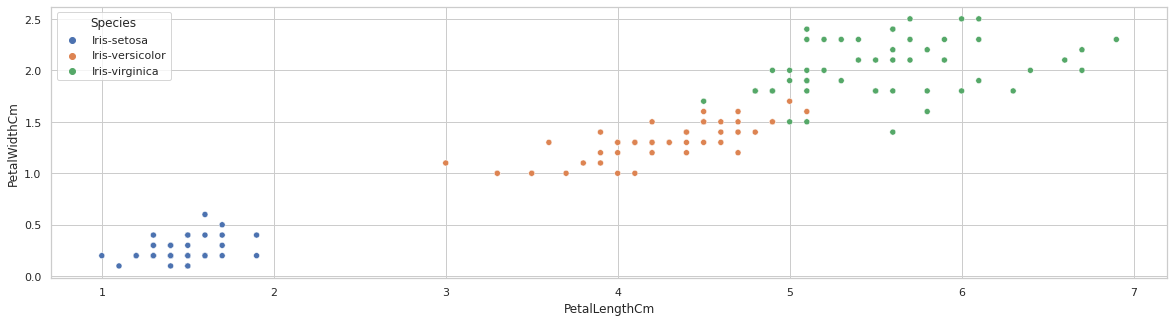

In [184]:

feature = data_frame['PetalLengthCm']
target = data_frame['PetalWidthCm']

plt.figure(figsize=(20, 5))
plt.subplot(1, 1 , 1)
sns.scatterplot(data = data_frame, x = feature, y = target, marker='o', hue="Species")


#### **III. Desarollo Experimental**
---



#### **Primera Parte**

conUtilizando el clasificador de regresión, debemos de generar datos de entrenamiento y prueba de diferentes tamaños para observar cual de estos tiene mejor rendimiento. Debido a que encontramos que las propiedades con mayor correlación son la longitud y ancho de los pétalos, podemos partir de esto para saber cual proporción entrenamiento-prueba nos conviene utilizar.

##### **Creación de modelo de 30% entrenamiento y 70 % prueba**



In [185]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression

features = ['SepalWidthCm','SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm']

X = data_frame.drop(['Id', 'Species','SepalWidthCm','PetalLengthCm'], axis=1)
y = data_frame['Species']

# separación de datos 30%-70%
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.7, random_state=5)

# creación del modelo de regresión lógisticacon
log_reg_model = LogisticRegression(C=1, penalty='l1', solver='liblinear')
# entrenamiento del modelo
log_reg_model.fit(X_train, Y_train)

# prueba del modelo
y_test_predict = log_reg_model.predict(X_test)

# calculo de la preicisión del modelocon
y_predict_30_70_accuracy = metrics.accuracy_score(Y_test, y_test_predict)

# calculo de matriz de confusion
cm_30_70 = confusion_matrix(Y_test, y_test_predict)

# cross-value score
lrg_30_70_cv = cross_val_score(log_reg_model, X_train, Y_train, cv=3, scoring="accuracy")
lrg_30_70_cv = lrg_30_70_cv.round(2)

##### **Creación de modelo de 50% entrenamiento y 50 % prueba**



In [186]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

features = ['SepalWidthCm','SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm']

X = data_frame.drop(['Id', 'Species','SepalWidthCm','PetalLengthCm'], axis=1)
y = data_frame['Species']

# separación de datos 50%-50%
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.5, random_state=5)

# creación del modelo de regresión lógistica
log_reg_model = LogisticRegression()
# entrenamiento del modelo
log_reg_model.fit(X_train, Y_train)

# prueba del modelo
y_test_predict = log_reg_model.predict(X_test)

# calculo de la preicisión del modelo
y_predict_50_50_accuracy = metrics.accuracy_score(Y_test, y_test_predict)

# calculo de matriz de confusion
cm_50_50 = confusion_matrix(Y_test, y_test_predict)

# cross-value score
lrg_50_50_cv = cross_val_score(log_reg_model, X_train, Y_train, cv=3, scoring="accuracy")
lrg_50_50_cv = lrg_50_50_cv.round(2)

##### **Creación de modelo de 70% entrenamiento y 30 % prueba**



In [187]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression

features = ['SepalWidthCm','SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm']

X = data_frame.drop(['Id', 'Species','SepalWidthCm','PetalLengthCm'], axis=1)
y = data_frame['Species']

# separación de datos 70%-30%
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state=5)

# creación del modelo de regresión lógistica
log_reg_model = LogisticRegression()
# entrenamiento del modelo
log_reg_model.fit(X_train, Y_train)

# prueba del modelo
y_test_predict = log_reg_model.predict(X_test)

# calculo de la preicisión del modelo
y_predict_70_30_accuracy = metrics.accuracy_score(Y_test, y_test_predict)

# calculo de matriz de confusion
cm_70_30 = confusion_matrix(Y_test, y_test_predict)

# cross-value score
lrg_70_30_cv = cross_val_score(log_reg_model, X_train, Y_train, cv=3, scoring="accuracy")
lrg_70_30_cv = lrg_70_30_cv.round(2)

##### **Clasificador con una variable**



In [188]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

features = ['SepalWidthCm','SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm']
y_accuracy = []
# separación de datos 30%-70%
test_size = [0.3, 0.5, 0.7]
# table["test size"][y_predict_accuracy, cm, lrg_cv]
table_1v = [[None]*3]* 4
table_labels_1v = [None]*4
n = 0

print("separación de datos %.1f%%, %.1f%%:" % ((1-0.3)*100,0.3*100))

for i in features:
        drop_values = []
        i_index = features.index(i)

        for drop_val in range(0,4):
            if(drop_val != i_index):
                drop_values.append(drop_val)

        tst_frame = data_frame
        X = tst_frame.drop(['Id', 'Species',features[drop_values[0]], features[drop_values[1]],features[drop_values[2]]], axis=1)
        y = tst_frame['Species']
        
        # separación de datos
        X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state=5)

        log_reg_model = LogisticRegression()
        log_reg_model.fit(X_train, Y_train)

        y_test_predict = log_reg_model.predict(X_test)
        y_predict_accuracy = metrics.accuracy_score(Y_test, y_test_predict).round(2)
        
        cm = confusion_matrix(Y_test, y_test_predict)

        lrg_cv = cross_val_score(log_reg_model, X_train, Y_train, cv=3, scoring="accuracy")
        lrg_cv = lrg_cv.round(2)
        print("[%s]" %(i))
        table_1v[n] = [y_predict_accuracy, cm, lrg_cv]
        table_labels_1v[n] = '{}'.format(i)
        n+=1

separación de datos 70.0%, 30.0%:
[SepalWidthCm]
[SepalLengthCm]
[PetalLengthCm]
[PetalWidthCm]


<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

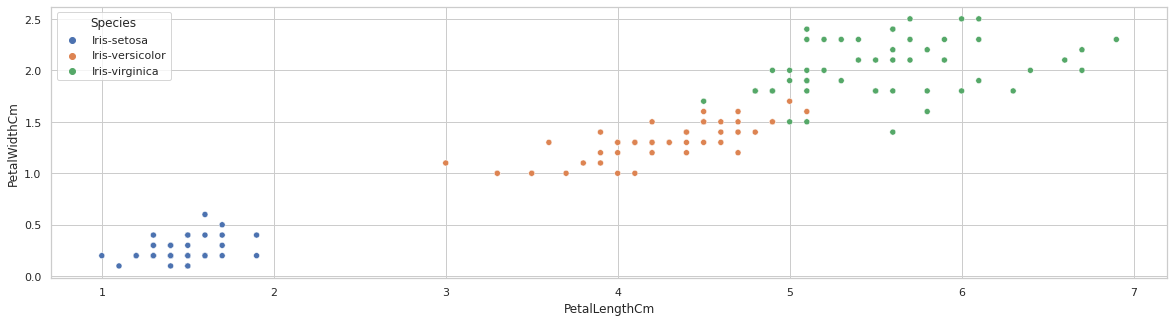

In [189]:
feature = data_frame['PetalLengthCm']
target = data_frame['PetalWidthCm']

plt.figure(figsize=(20, 5))
plt.subplot(1, 1 , 1)
sns.scatterplot(data = data_frame, x = feature, y = target, marker='o', hue="Species")

##### **Clasificador con dos variables**



In [190]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

features = ['SepalWidthCm','SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm']
y_accuracy = []
# separación de datos 30%-70%
test_size = [0.3, 0.5, 0.7]
# table["test size"][y_predict_accuracy, cm, lrg_cv]
table_2v = [None]* 12
table_labels_2v = [None]*12
m,n,l = 0,0,0

print("separación de datos %.1f%%, %.1f%%:" % ((1-0.3)*100,0.3*100))
for i in features:
    for j in features:
        if(i != j):
            drop_values = []
            i_index = features.index(i)
            j_index = features.index(j)

            for drop_val in range(0,4):
                if(drop_val != i_index and drop_val != j_index):
                    drop_values.append(drop_val)
            
            tst_frame = data_frame
            X = tst_frame.drop(['Id', 'Species',features[drop_values[0]], features[drop_values[1]]], axis=1)
            y = tst_frame['Species']

            # separación de datos
            X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state=5)

            log_reg_model = LogisticRegression()
            log_reg_model.fit(X_train, Y_train)

            y_test_predict = log_reg_model.predict(X_test)
            y_predict_accuracy = metrics.accuracy_score(Y_test, y_test_predict).round(2)
            

            cm = confusion_matrix(Y_test, y_test_predict)

            lrg_cv = cross_val_score(log_reg_model, X_train, Y_train, cv=3, scoring="accuracy")
            lrg_cv = lrg_cv.round(2)
            print("[%s,%s]" %(i,j))
            table_2v[n] = [y_predict_accuracy, cm, lrg_cv]
            table_labels_2v[n] = '{}/{}'.format(i,j)
            if(n >= 11):
                n = 0
            else:
                n += 1


separación de datos 70.0%, 30.0%:
[SepalWidthCm,SepalLengthCm]
[SepalWidthCm,PetalLengthCm]
[SepalWidthCm,PetalWidthCm]
[SepalLengthCm,SepalWidthCm]
[SepalLengthCm,PetalLengthCm]
[SepalLengthCm,PetalWidthCm]
[PetalLengthCm,SepalWidthCm]
[PetalLengthCm,SepalLengthCm]
[PetalLengthCm,PetalWidthCm]
[PetalWidthCm,SepalWidthCm]
[PetalWidthCm,SepalLengthCm]
[PetalWidthCm,PetalLengthCm]


##### **Penalización a clasificador**
##### Tipo L1:



In [191]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression

features = ['SepalWidthCm','SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm']

X = data_frame.drop(['Id', 'Species','SepalWidthCm','PetalLengthCm'], axis=1)
y = data_frame['Species']

# separación de datos 70%-30%
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state=5)

# creación del modelo de regresión lógistica
log_reg_model = LogisticRegression(C=0.001, penalty='l1', solver='liblinear')
# entrenamiento del modelo
log_reg_model.fit(X_train, Y_train)

# prueba del modelo
y_test_predict = log_reg_model.predict(X_test)

# calculo de la preicisión del modelo
y_predict_l1_accuracy = metrics.accuracy_score(Y_test, y_test_predict)

# calculo de matriz de confusion
cm_l1 = confusion_matrix(Y_test, y_test_predict)

# cross-value score
lrg_l1_cv = cross_val_score(log_reg_model, X_train, Y_train, cv=3, scoring="accuracy")
lrg_l1_cv = lrg_l1_cv.round(2)

##### Tipo L2:

In [192]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression

features = ['SepalWidthCm','SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm']

X = data_frame.drop(['Id', 'Species','SepalWidthCm','PetalLengthCm'], axis=1)
y = data_frame['Species']

# separación de datos 70%-30%
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state=5)

# creación del modelo de regresión lógistica
log_reg_model =  LogisticRegression(C=0.001, penalty='l2', solver='liblinear')
# entrenamiento del modelo
log_reg_model.fit(X_train, Y_train)

# prueba del modelo
y_test_predict = log_reg_model.predict(X_test)

# calculo de la preicisión del modelo
y_predict_l2_accuracy = metrics.accuracy_score(Y_test, y_test_predict)

# calculo de matriz de confusion
cm_l2 = confusion_matrix(Y_test, y_test_predict)

# cross-value score
lrg_l2_cv = cross_val_score(log_reg_model, X_train, Y_train, cv=3, scoring="accuracy")
lrg_l2_cv = lrg_l2_cv.round(2)

##### Tipo elasticnet:

In [193]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression

features = ['SepalWidthCm','SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm']

X = data_frame.drop(['Id', 'Species','SepalWidthCm','PetalLengthCm'], axis=1)
y = data_frame['Species']

# separación de datos 70%-30%
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state=5)

# creación del modelo de regresión lógistica
log_reg_model =  LogisticRegression(C=0.001, penalty='l2', solver='liblinear')
# entrenamiento del modelo
log_reg_model.fit(X_train, Y_train)

# prueba del modelo
y_test_predict = log_reg_model.predict(X_test)

# calculo de la preicisión del modelo
y_predict_elasticnet_accuracy = metrics.accuracy_score(Y_test, y_test_predict)

# calculo de matriz de confusion
cm_elasticnet = confusion_matrix(Y_test, y_test_predict)

# cross-value score
lrg_elasticnet_cv = cross_val_score(log_reg_model, X_train, Y_train, cv=3, scoring="accuracy")
lrg_elasticnet_cv = lrg_elasticnet_cv.round(2)

#### **IV. Resultados**
---



#### **Primera Parte**

##### **Generación de datos de entrenamiento y prueba 30-70, 50-50, 70-30**

In [194]:
import pandas as pd

data = [["{}%".format(y_predict_30_70_accuracy.round(2)), cm_30_70, lrg_30_70_cv],["{}%".format(y_predict_50_50_accuracy.round(2)), cm_50_50, lrg_50_50_cv],["{}%".format(y_predict_elasticnet_accuracy.round(2)), cm_70_30, lrg_70_30_cv]]
indx = ['30% entrenamiento - 70% prueba','50% entrenamiento - 50% prueba','70% entrenamiento - 30% prueba']
pd.DataFrame(data, columns=["Precisión", "Cross-Value", "Matriz de confusión"], index = indx)

Precisión  \
30% entrenamiento - 70% prueba     0.69%   
50% entrenamiento - 50% prueba     0.89%   
70% entrenamiento - 30% prueba     0.31%   

                                                         Cross-Value  \
30% entrenamiento - 70% prueba  [[34, 0, 0], [0, 6, 33], [0, 0, 32]]   
50% entrenamiento - 50% prueba  [[22, 0, 0], [2, 23, 4], [0, 2, 22]]   
70% entrenamiento - 30% prueba  [[15, 0, 0], [0, 15, 1], [0, 2, 12]]   

                               Matriz de confusión  
30% entrenamiento - 70% prueba  [0.73, 0.73, 0.87]  
50% entrenamiento - 50% prueba  [0.92, 0.96, 0.76]  
70% entrenamiento - 30% prueba  [0.89, 0.94, 0.94]

A partir de los resultados anteriores, podemos afirmar que la proporción más adecuada para nuestro dividir nuestro data set sería 70% entrenamiento - 30% prueba. De esta manera podemos asegurar que nuestro clasificador tenga resultados más precisos. 

##### **Clasificador con una variable**

In [195]:
import pandas as pd
# table["test size"][y_predict_accuracy, cm, lrg_cv]
table_df = []*4

for i in range(0,4):
    table_df.append(table_1v[i])

pd.DataFrame(table_df, columns=["Precisión", "Cross-Value", "Matriz de confusión"], index = table_labels_1v)


Precisión                           Cross-Value  \
SepalWidthCm        0.51    [[12, 0, 3], [2, 8, 6], [3, 8, 3]]   
SepalLengthCm       0.80  [[15, 0, 0], [2, 10, 4], [0, 3, 11]]   
PetalLengthCm       0.98  [[15, 0, 0], [0, 15, 1], [0, 0, 14]]   
PetalWidthCm        0.93  [[15, 0, 0], [0, 15, 1], [0, 2, 12]]   

              Matriz de confusión  
SepalWidthCm   [0.54, 0.54, 0.63]  
SepalLengthCm  [0.63, 0.74, 0.74]  
PetalLengthCm  [0.91, 0.97, 0.94]  
PetalWidthCm   [0.94, 0.97, 0.97]

A partir de los resultados obtenidos del experimento anterior, podemos concluir que la variable que tiene mayor peso para los resultados es el ancho del pétalo (PetalWidth); esto nos quiere decir que es la que tiene mayor correlación con las otras variables. 
Si observamos la matríz de correlación obtenida previamente, podemos observar que lo mismo sucede, petalwidth siendo el que tiene mayor correlación con las demás variables.

##### **Clasificador con dos variables**

In [196]:
import pandas as pd
# table["test size"][y_predict_accuracy, cm, lrg_cv]
table_df = [[None]*3]*12

for j in range(0,12):
    predict_acc = table_2v[j][0]
    cm = table_2v[j][1]
    cv = table_2v[j][2]
    table_df[j] = [predict_acc,cm,cv]

pd.DataFrame(table_df, columns=["Precisión", "Cross-Value", "Matriz de confusión"], index = table_labels_2v)


Precisión                           Cross-Value  \
SepalWidthCm/SepalLengthCm        0.84  [[15, 0, 0], [0, 13, 3], [0, 4, 10]]   
SepalWidthCm/PetalLengthCm        0.98  [[15, 0, 0], [0, 15, 1], [0, 0, 14]]   
SepalWidthCm/PetalWidthCm         0.93  [[15, 0, 0], [0, 15, 1], [0, 2, 12]]   
SepalLengthCm/SepalWidthCm        0.84  [[15, 0, 0], [0, 13, 3], [0, 4, 10]]   
SepalLengthCm/PetalLengthCm       0.96  [[15, 0, 0], [0, 14, 2], [0, 0, 14]]   
SepalLengthCm/PetalWidthCm        0.93  [[15, 0, 0], [0, 15, 1], [0, 2, 12]]   
PetalLengthCm/SepalWidthCm        0.98  [[15, 0, 0], [0, 15, 1], [0, 0, 14]]   
PetalLengthCm/SepalLengthCm       0.96  [[15, 0, 0], [0, 14, 2], [0, 0, 14]]   
PetalLengthCm/PetalWidthCm        0.98  [[15, 0, 0], [0, 15, 1], [0, 0, 14]]   
PetalWidthCm/SepalWidthCm         0.93  [[15, 0, 0], [0, 15, 1], [0, 2, 12]]   
PetalWidthCm/SepalLengthCm        0.93  [[15, 0, 0], [0, 15, 1], [0, 2, 12]]   
PetalWidthCm/PetalLengthCm        0.98  [[15, 0, 0], [0, 15, 1], [0, 0, 14]]   

                            Matriz de confusión  
SepalWidthCm/SepalLengthCm    [0.71, 0.8, 0.77]  
SepalWidthCm/PetalLengthCm   [0.91, 0.97, 0.94]  
SepalWidthCm/PetalWidthCm    [0.94, 0.94, 0.91]  
SepalLengthCm/SepalWidthCm    [0.71, 0.8, 0.77]  
SepalLengthCm/PetalLengthCm   [0.94, 1.0, 0.94]  
SepalLengthCm/PetalWidthCm   [0.89, 0.94, 0.94]  
PetalLengthCm/SepalWidthCm   [0.91, 0.97, 0.94]  
PetalLengthCm/SepalLengthCm   [0.94, 1.0, 0.94]  
PetalLengthCm/PetalWidthCm   [0.97, 0.97, 0.94]  
PetalWidthCm/SepalWidthCm    [0.94, 0.94, 0.91]  
PetalWidthCm/SepalLengthCm   [0.89, 0.94, 0.94]  
PetalWidthCm/PetalLengthCm   [0.97, 0.97, 0.94]

Podemos afirmar a partir de los resultados anteriores, que las variables de longitud y ancho del pétalo resultan ser las variables que más aportan peso a la precisión en los resultados; esto se debe a que estas variables poseen una alta correlación, es decir siguen un patrón más lineal que respecto a otras. 

##### **Penalización**

In [197]:
import pandas as pd

data = [["{}%".format(y_predict_l1_accuracy.round(2)), cm_l1, lrg_l1_cv],["{}%".format(y_predict_l2_accuracy.round(2)), cm_l2, lrg_l2_cv],["{}%".format(y_predict_elasticnet_accuracy.round(2)), cm_elasticnet, lrg_elasticnet_cv]]
indx = ['Penalización L1','Penalización L2','Penalización elasticnet']
pd.DataFrame(data, columns=["Precisión", "Cross-Value", "Matriz de confusión"], index = indx)

Precisión                           Cross-Value  \
Penalización L1             0.33%  [[15, 0, 0], [16, 0, 0], [14, 0, 0]]   
Penalización L2             0.31%  [[0, 0, 15], [0, 0, 16], [0, 0, 14]]   
Penalización elasticnet     0.31%  [[0, 0, 15], [0, 0, 16], [0, 0, 14]]   

                        Matriz de confusión  
Penalización L1          [0.31, 0.34, 0.34]  
Penalización L2          [0.34, 0.34, 0.34]  
Penalización elasticnet  [0.34, 0.34, 0.34]

A partir de los resultados anteriores, podemos afirmar que utilizando la penalización L1, nos provee de mejores resultados; para estos resultados se considero la relación 70%-30% dado a que encontramos que esta era la más adecuada para realizar el experimento.

#### **IV. Conclusiones**
---
Puedo afirmar que se pudieron obtener los resultados esperados de los experimentos, de manera que se utiliza regreión lógistica para clasificar a las flores. Esta resulta una herramienta muy útil dado a que nos permite modelar sistemas de dos o más variables. A partir de los resultados obtenidos en las pruebas pude verificar que es mejor tener una cantidad mayor de datos para entrenar el modelo; esto hace que aumente la precisión del clasificador. 

#### **V. Repositorio del proyecto**
---

<img width="30" height="30" align ="right" src="img/gitlab-282507.png">

https://gitlab.com/cv4497/aprendizajemaquinav2021/-/tree/master/Proyectos/P2_CL_FLORES

#### **VI. Video**
---
https://gitlab.com/cv4497/aprendizajemaquinav2021/-/tree/master/Proyectos/P2_CL_FLORES/video

#### **VI. Referencias**
---





Dipanjan Sarkar, Raghav Bali, & Tushar Sharma. (2018). Practical Machine Learning with Python : A Problem-Solver’s Guide to Building Real-World Intelligent Systems. Apress. 